overweriting
[0.082]
[0.0504]
[0.2]
[ 0.2         0.19996     0.1999199  ... -0.08000912 -0.07965994
 -0.0793108 ]


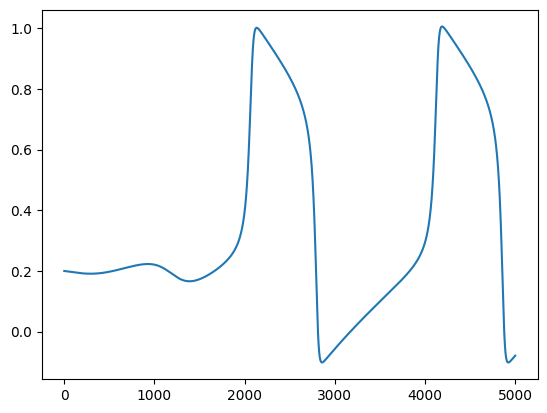

In [17]:
import numpy as np
import matplotlib.pyplot as plt
t_w=50
import os
def generateExactSolution(t,dt,x0,w0,rate,P,begin,end):
    
    
    n2=int(t/(dt))+2
    n = int((end-begin)/(dt*rate))
    Sol=np.zeros((n,3))
  
    Sol2=np.zeros((n2,2))
    Sol2[0]=x0,w0
    T=0
    k=0
    while(k<n2-1):
        x,w=Sol2[k]
        Sol2[k+1]=10*(x*(x-0.4)*(1-x)-w + P)*dt+  x, 0.2*(x*0.2-0.8*w)*dt +w
 
        if ((k*dt==begin or ((k+1)%rate == 0 and k*dt>=begin and k*dt<=end))and T<n):
          
           
            Sol[T] = Sol2[k][0],Sol2[k][1] , k*dt
            T=T+1
        
        k=k+1
        if(k*dt > end):
            break
    return Sol

def getConstraintFromData(w_i=1, data_folder="./validatiaon/"):
    try:
        os.mkdir(data_folder)
    except:
        print("overweriting")
    T = np.empty(0)
    K = np.empty(0)
    SOLs = np.empty(0)
    SOLw = np.empty(0)
    V = np.empty(0)
    U = np.empty(0)
    krange = [(0.08 + 0.05 * i * 0.04) for i in range(1,2)]
    vrange = [(0 + 0.01 ) for i in range(6,7)]
    urange = [(0 + 0.1 * i * 1) for i in range(2, 3)]
    deltaT = 0.01
    
    print(krange)
    print(vrange)
    print(urange)
    rate = 1
    i=0
    for UR in urange:
        for KR in krange:
            for VR in vrange:
                sol = generateExactSolution(t_w, deltaT, UR, VR, rate, KR, 0, t_w)

                T = np.append(T, sol.T[2] - 0)
                K = np.append(K, np.full_like(sol.T[2], KR))
                U = np.append(U, np.full_like(sol.T[2], UR))
                V = np.append(V, np.full_like(sol.T[2], VR))
                SOLs = np.append(SOLs, sol.T[0])
                SOLw = np.append(SOLw, sol.T[1])
                i=i+1

    print(SOLs)
    plt.plot(SOLs)
    plt.show()
    # Save data arrays to CSV files
    np.save(data_folder + "T.npy", T)
    np.save(data_folder + "K.npy", K)
    np.save(data_folder + "U.npy", U)
    np.save(data_folder + "V.npy", V)
    np.save(data_folder + "SOLs.npy", SOLs)
    np.save(data_folder + "SOLw.npy", SOLw)
    
    
getConstraintFromData()
